# Denoising AutoEncoder

In [1]:
# %tensorflow_version 2.x

In [2]:

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras.datasets import mnist


## Get the dataset

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(60000,28, 28,1).astype('float32')
x_test = x_test.reshape(10000,28, 28,1).astype('float32')

x_train /= 255.
x_test /= 255.


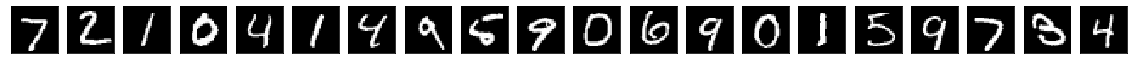

In [4]:

n = 20  # Num images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Building the Model

### The Encoder

In [5]:


# The encoding process
input_img = Input(shape=(28, 28, 1))  

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size =  (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


### The Decoder

In [6]:

# UpSampling1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# UpSampling2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# UpSampling3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

## Compile the Model

In [7]:
# create the model
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1994 - val_loss: 0.1386
Epoch 2/100
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1302 - val_loss: 0.1227
Epoch 3/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1194 - val_loss: 0.1150
Epoch 4/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1138 - val_loss: 0.1108
Epoch 5/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1105 - val_loss: 0.1080
Epoch 6/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1081 - val_loss: 0.1058
Epoch 7/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1062 - val_loss: 0.1044loss: 0.106
Epoch 8/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1047 - val_loss: 0.1027
Epoch 9/100
60000/60000 [==============================] - 6s 103u

60000/60000 [==============================] - 3s 43us/sample - loss: 0.0887 - val_loss: 0.0876
Epoch 76/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0887 - val_loss: 0.0878
Epoch 77/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0887 - val_loss: 0.0875
Epoch 78/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0886 - val_loss: 0.0874
Epoch 79/100
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0886 - val_loss: 0.0876
Epoch 80/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0885 - val_loss: 0.0880
Epoch 81/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0885 - val_loss: 0.0875
Epoch 82/100
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0883 - val_loss: 0.0872
Epoch 83/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0884 - val_loss: 0.0875
Epoch 84/100
60000/60000 [======

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

### Checking some predictions

In [10]:
decoded_imgs = autoencoder.predict(x_test)

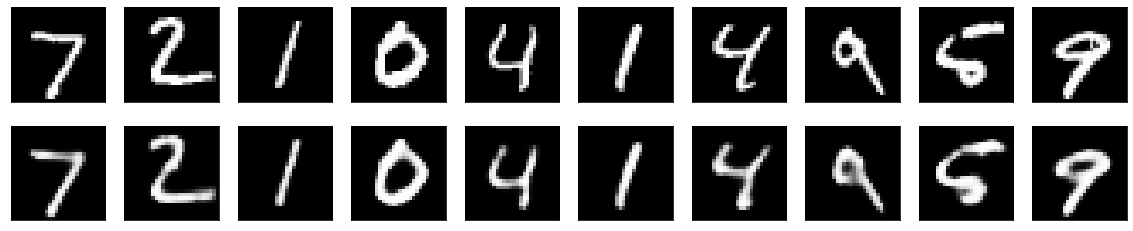

In [11]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Using the AutoEncoder for Denoising 

In [12]:
# adding noise to the images
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

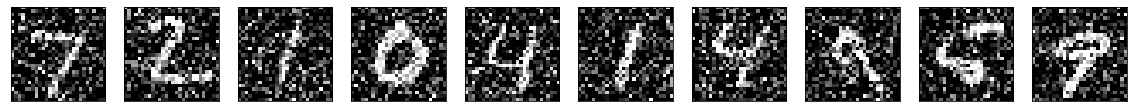

In [13]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1431 - val_loss: 0.1248
Epoch 2/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1233 - val_loss: 0.1199
Epoch 3/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1194 - val_loss: 0.1161
Epoch 4/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1161 - val_loss: 0.1136
Epoch 5/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1144 - val_loss: 0.1125
Epoch 6/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1131 - val_loss: 0.1113
Epoch 7/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1116 - val_loss: 0.1099
Epoch 8/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1111 - val_loss: 0.1093
Epoch 9/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.11

Epoch 76/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1050 - val_loss: 0.1038
Epoch 77/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1050 - val_loss: 0.1036
Epoch 78/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1050 - val_loss: 0.1037
Epoch 79/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1049 - val_loss: 0.1039
Epoch 80/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1049 - val_loss: 0.1037
Epoch 81/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1049 - val_loss: 0.1045
Epoch 82/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1049 - val_loss: 0.1038
Epoch 83/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1049 - val_loss: 0.1039
Epoch 84/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1048 - val_loss: 0.1036
Epoch 85/100
60000/

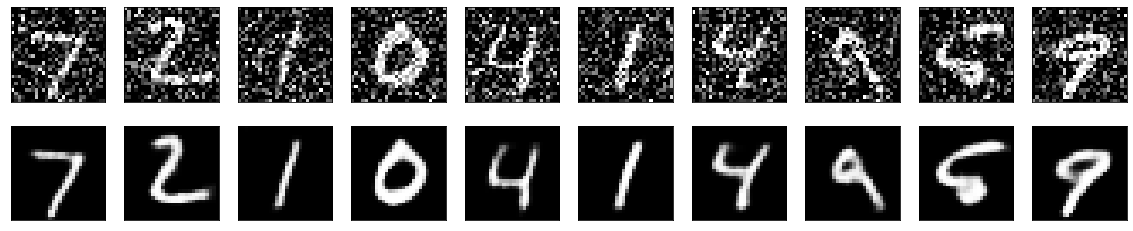

In [15]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()